 # **Trending YouTube Videos (USA)**

---













> **Quarantine drives me nuts, during the last 2 months, I got obsessed with watching TouTube videos and spent around 5 hours everyday on YouTube. My favorite catogories are fitness, food tour and cooking. I am kind of curious about what are the most popular videos among people in the whole US, and why people get addicted to YouTube so easily!!!**



![alt text](https://drive.google.com/uc?id=1r6V9HwNeqc9ohOBXvh151D-G_uh4zZ8E)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [0]:
import json

## Load and Transfer Data

In [0]:
raw = pd.read_csv('/content/drive/My Drive/Home/YouTube playplay bibina/USvideos.csv',index_col='video_id')

In [9]:
raw.head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


*   **Standardize the format of date and drop useless columns**




In [0]:
raw.trending_date = pd.to_datetime(raw.trending_date,format='%y.%d.%m',errors='ignore')

In [11]:
raw.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [0]:
raw.drop(['publish_time','thumbnail_link', 'comments_disabled', 'ratings_disabled','video_error_or_removed']
                ,axis=1,inplace=True)

In [13]:
raw.category_id.max()

43

*  **Extract the category information from json file and merge it with the raw data frame**

In [0]:
f = open('/content/drive/My Drive/Home/YouTube playplay bibina/US_category_id.json')
data = json.load(f)
f.close()

In [0]:
id = []
for i in range(len(data['items'])):
  id.append(data['items'][i]['id'])

In [0]:
cat = []
for i in range(len(data['items'])):
  cat.append(data['items'][i]['snippet']['title'])

In [0]:
cat_info = pd.DataFrame({'id':map(int,id), 'name':cat})

In [0]:
next = pd.merge(raw,cat_info,how='inner',left_on='category_id',right_on='id')

# EDA

In [19]:
min(next.trending_date)

Timestamp('2017-11-14 00:00:00')

In [20]:
max(next.trending_date)

Timestamp('2018-06-14 00:00:00')

### Category

* **First, Let's find out the Top 10 Categories measured in different scale**

In [0]:
def plotbar(metric):
  df = next.groupby('name').sum().reset_index().sort_values(by=metric,ascending=False)
  plt.figure(figsize=(16,4))
  sns.barplot(x='name',y=metric,data=df.head(10),palette='Set2')
  plt.title("Top 10 Categories with the most "+metric, fontsize=20)

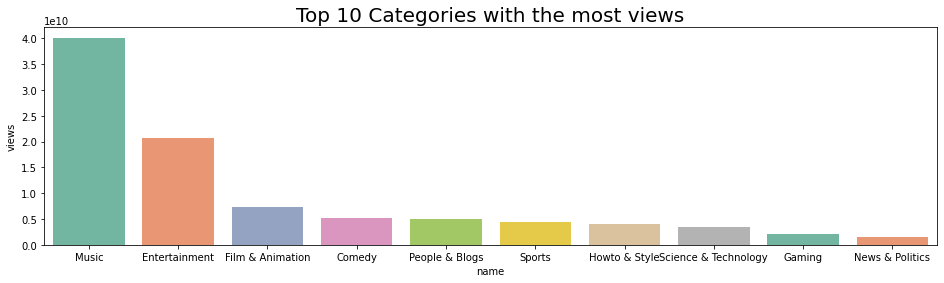

In [22]:
plotbar('views')

* **We can see that there are 4 billion views for all the music videos in 8 months, which I am not suprised at all, because singers always release their music video on Youtube in the first place. Ariana Grande's single music video 'Side to Side' has a humungous number of views for more than 1.7 billion.**
> ![alt text](https://drive.google.com/uc?id=1ogFaYAQJZjm9us2yANZpr_jD8bNfa_Hp)






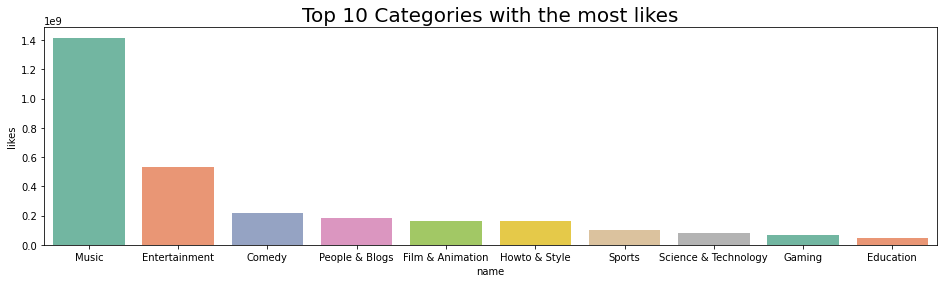

In [23]:
plotbar('likes')

* **Education is not in the Top 10 categories in most views, but it get relatively large amount of likes. It seems that people appreciate what they do not know about.**

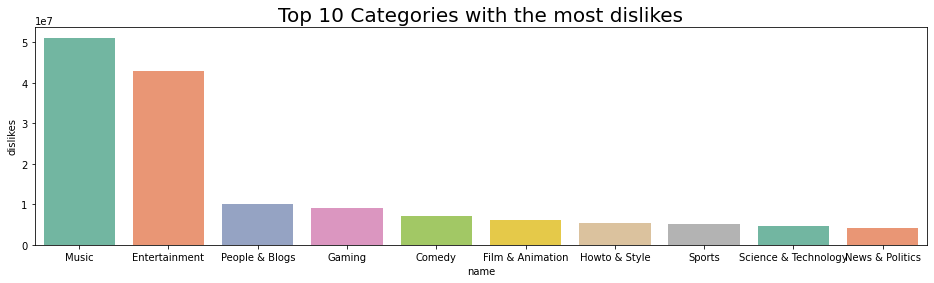

In [24]:
plotbar('dislikes')

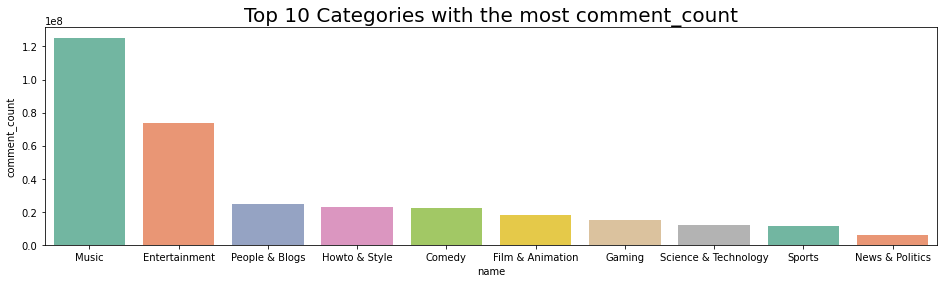

In [25]:
plotbar('comment_count')

* **People & Blogs got more likes, dislikes and comments compared to views. Internet influencers are more likely to create topics. They have fanatical followers and also haters leading to more discussions under the videos.**

### Channel

In [0]:
channel = next.groupby('channel_title').sum().sort_values(by='views',ascending =
                                                              False).head(10).drop(['category_id','id'],axis=1)

* **The Top 10 popular channels are as below, Let's take a closer look of each of them**

In [27]:
channel

,views,likes,dislikes,comment_count
channel_title,,,,
ChildishGambinoVEVO,3758488765,96700818,6054434,10151289
ibighit,2235906679,199247121,3467306,31817464
Dude Perfect,1870085178,60275557,1501477,4009163
Marvel Entertainment,1808998971,55873344,1031250,6453560
ArianaGrandeVevo,1576959172,52170970,1931230,4295333
MalumaVEVO,1551515831,23278380,1757948,1227634
jypentertainment,1486972132,44900910,2482131,7575510
Sony Pictures Entertainment,1432374398,30106808,1414686,3533551
FoxStarHindi,1238609854,23762509,910745,1782776


* **Almost all of them are music and entertainment channels! We can easily recognized that there are some singers' and entertainment companies' official channels. They all have tremendous number of followers**


> **Note: ibighit is a k-pop music channel, Dude Perfect is a sport channel and FoxStarHindi is a Bollywood movie channel.**
![alt text](https://drive.google.com/uc?id=1extcOfiFJfnzjBRqAib9lMUUrOg8C_qm)
![alt text](https://drive.google.com/uc?id=1HDtkEuktsZlX0o-SlwLIJKKJ3AvKWeM7)
![alt text](https://drive.google.com/uc?id=1lkSIQcjrRXusJcfFel38qOMp5QZqeznj)





* **Next, I would like to check out what I am interested about. I'm not quite sure what exactly do the category names stand for. So I'm gonna try "Travel & Events" which seems like what I would usually watch.**

In [28]:
next[next.name=='Travel & Events'].groupby('channel_title').sum().sort_values(by='views',ascending =
                                                              False).head(10).drop(['category_id','id'],axis=1)

,views,likes,dislikes,comment_count
channel_title,,,,
Turkish Airlines,86666242,22641,1826,2433
Strictly Dumpling,69479392,1403067,49109,199585
The Food Ranger,33575837,733155,64278,161080
FOOD INSIDER,23971240,193669,27579,58686
Condé Nast Traveler,18099467,533200,25677,153842
INSIDER,16297287,306600,10681,28188
Sam Chui,11779203,102016,10193,9967
Horizon Productions SFL,11218319,68631,4059,18463
Mark Wiens,10950511,294676,13484,46535


* **Ta-da! I found what I expected to see! I am a loyal fan of Strictly Dumpling and Food Insider, but no idea why turkish airline ranks the highest.**


> ![alt text](https://drive.google.com/uc?id=11fTACD5Nz1BakY4naLejZ3C-027D59WV)
![alt text](https://drive.google.com/uc?id=1PBkkgn-kpfiC6jzJ-LPMoitGQY-7yOJ1)

* **I highly suspect that when I watch one video from a particular category, YouTube would recommend the best blogger to attract me so that I can hardly get rid of it!!!**





### Time

In [0]:
next['month']=next['trending_date'].apply(lambda m: m.month)

In [0]:
next['dayofweek']=next['trending_date'].apply(lambda m: m.dayofweek)

In [0]:
month = next.groupby('month').sum()
dayofweek = next.groupby('dayofweek').sum()

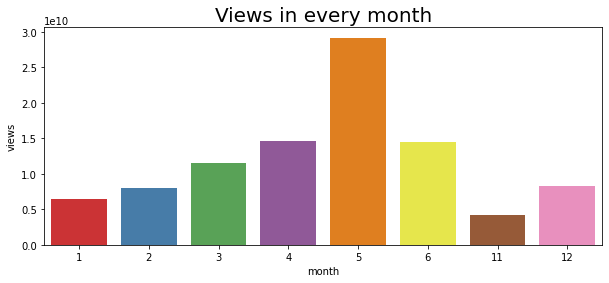

In [32]:
plt.figure(figsize=(10,4))
plt.title('Views in every month',fontsize=20)
sns.barplot(x=month.index,y=month.views,data=month,palette = 'Set1')


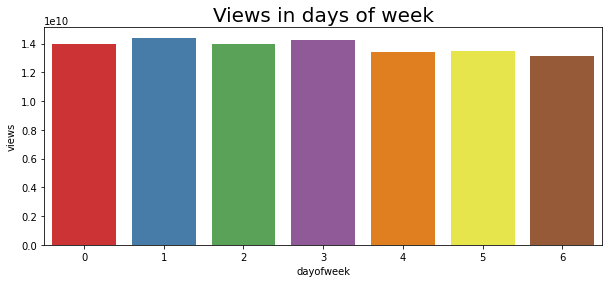

In [33]:
plt.figure(figsize=(10,4))
plt.title('Views in days of week',fontsize=20)
sns.barplot(x=dayofweek.index,y=dayofweek.views,data=month,palette = 'Set1')

* **May got a lot more views compared to other months, and Monday got the most views during a week. However, I'm not sure about the reason...**

### Content

* **Now I'm going to use some NLP technique to deal with titles and tags**

In [108]:
import os
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def word_length(data,t):
  return data[t].apply(lambda s: len(str(s).split()))

In [0]:
def text_process(t):
    """
    Takes in a string of text, then performs the following:
    1. Remove all special characters and numbers
    2. Remove all punctuation
    3. Remove all stopwords
    4. Returns a list of the cleaned text
    """

    # Remove all the special characters and numbers
    t = [re.sub(r"[^a-zA-Z]+", ' ', str(k)) for k in t.apply(lambda w: w.split())]

    # Check characters to see if they are in punctuation
    nopunc = [char for char in t if char not in string.punctuation]
    
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Remove any stopwords
    return  [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [0]:
next['title_length'] = word_length(next,'title')
next['tag_length'] = word_length(next,'tags')



*   **Will the length of titles and tags affect views?**



In [0]:
def plot_length(x):
  plt.figure(figsize=(10,4))
  plt.title('Relationship between '+x+' and views',fontsize=20)
  sns.lineplot(x=x,y='views',data=next)

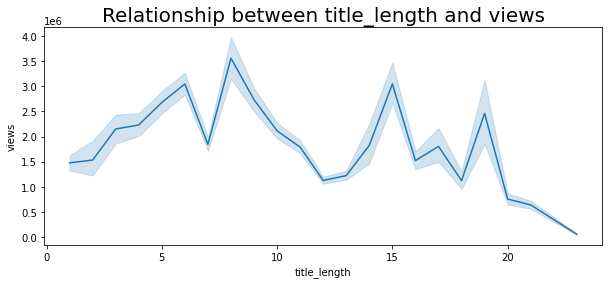

In [68]:
plot_length('title_length')

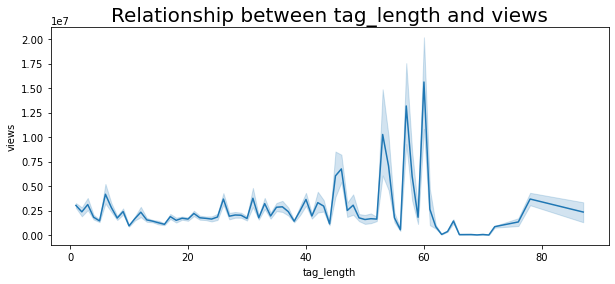

In [69]:
plot_length('tag_length')

* **As you can see, nearly all the titles are within 20 words, and too short or too long a title would both affect views of videos. The optimal number of words seem less than 10.**
* **The length of tags has a larger variance, tags may contain more information Youtubers would like to convey. Also, more tags can relate to larger scale of topics and increase the probability of being noticed.**


>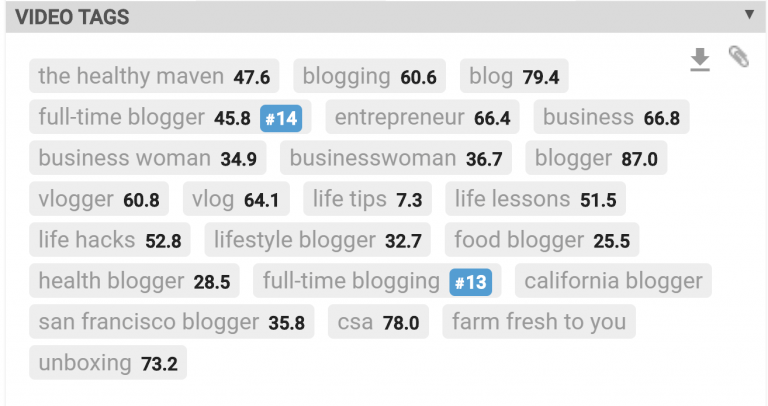



* **Next, I will dive into the content of titles and tags to see what specific things caught people's eyes.**

In [0]:
title = pd.DataFrame(text_process(next['title'].apply(lambda s: s.lower())))

In [0]:
title.columns=['words']

In [0]:
wordlist1 = pd.value_counts(title.words,ascending=False).head(50)

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
def getwordcloud(wl):
  word = ' '
  for i in wl.index:
    word = word + i + ' '
  wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(word) 
  plt.figure(figsize = (10, 5), facecolor = None) 
  plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear") 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show() 

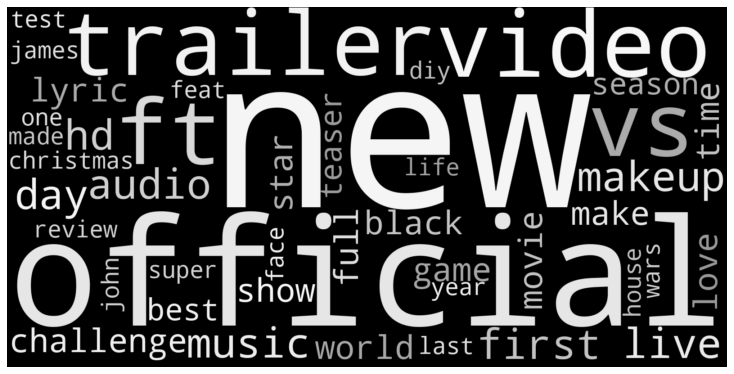

In [171]:
getwordcloud(wordlist1)

* **Hooray! I extracted the Top 50 most frequent words in Youtube video titles and put them into the word cloud. No doubt that the most popular categories are music and entertainment, there are plenty of words related to music videos and movies like "offial", "trailer", "teaser", "lyric" and of course "music" and "movie".**

> <img src="https://drive.google.com/uc?id=1PK64dX5iC-lurf7buzE80FTKvCPSuhS6" width="450">
<img src="https://drive.google.com/uc?id=1vQF2o9nOZT6He9QCPPZIDQjQ4WZgKwRy" width="450">

* **Besides these, we can also find some topics that attract people's attention intuitively like "makeup", "challenge", "best", "test", which are closely related to out lives.**

> <img src="https://drive.google.com/uc?id=17DtuKo0GNuOUk2LqGoW-uUrgLJKQRzKO" width="450">
<img src="https://drive.google.com/uc?id=1r9fYgericucZCVMW_cymAMqvpvqw8-HQ" width="450">


* **Now do the same things to tags**

In [0]:
tags = pd.DataFrame(text_process(next['tags'].apply(lambda s: s.lower())))
tags.columns=['words']
wordlist2 = pd.value_counts(tags.words,ascending=False).head(50)

* **Here comes the tags. Not much difference but we can see a clearer picture of what people like with more concrete descriptions.**

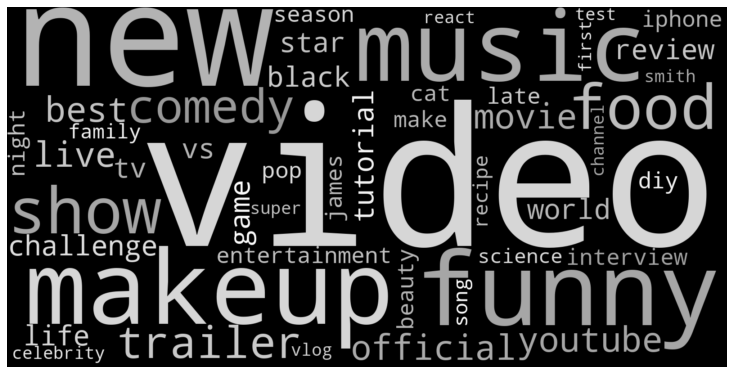

In [174]:
getwordcloud(wordlist2)

### Byeda



> **That's it! Youtube is known for its amazing recommendation system. Maybe I would check that out some day!**



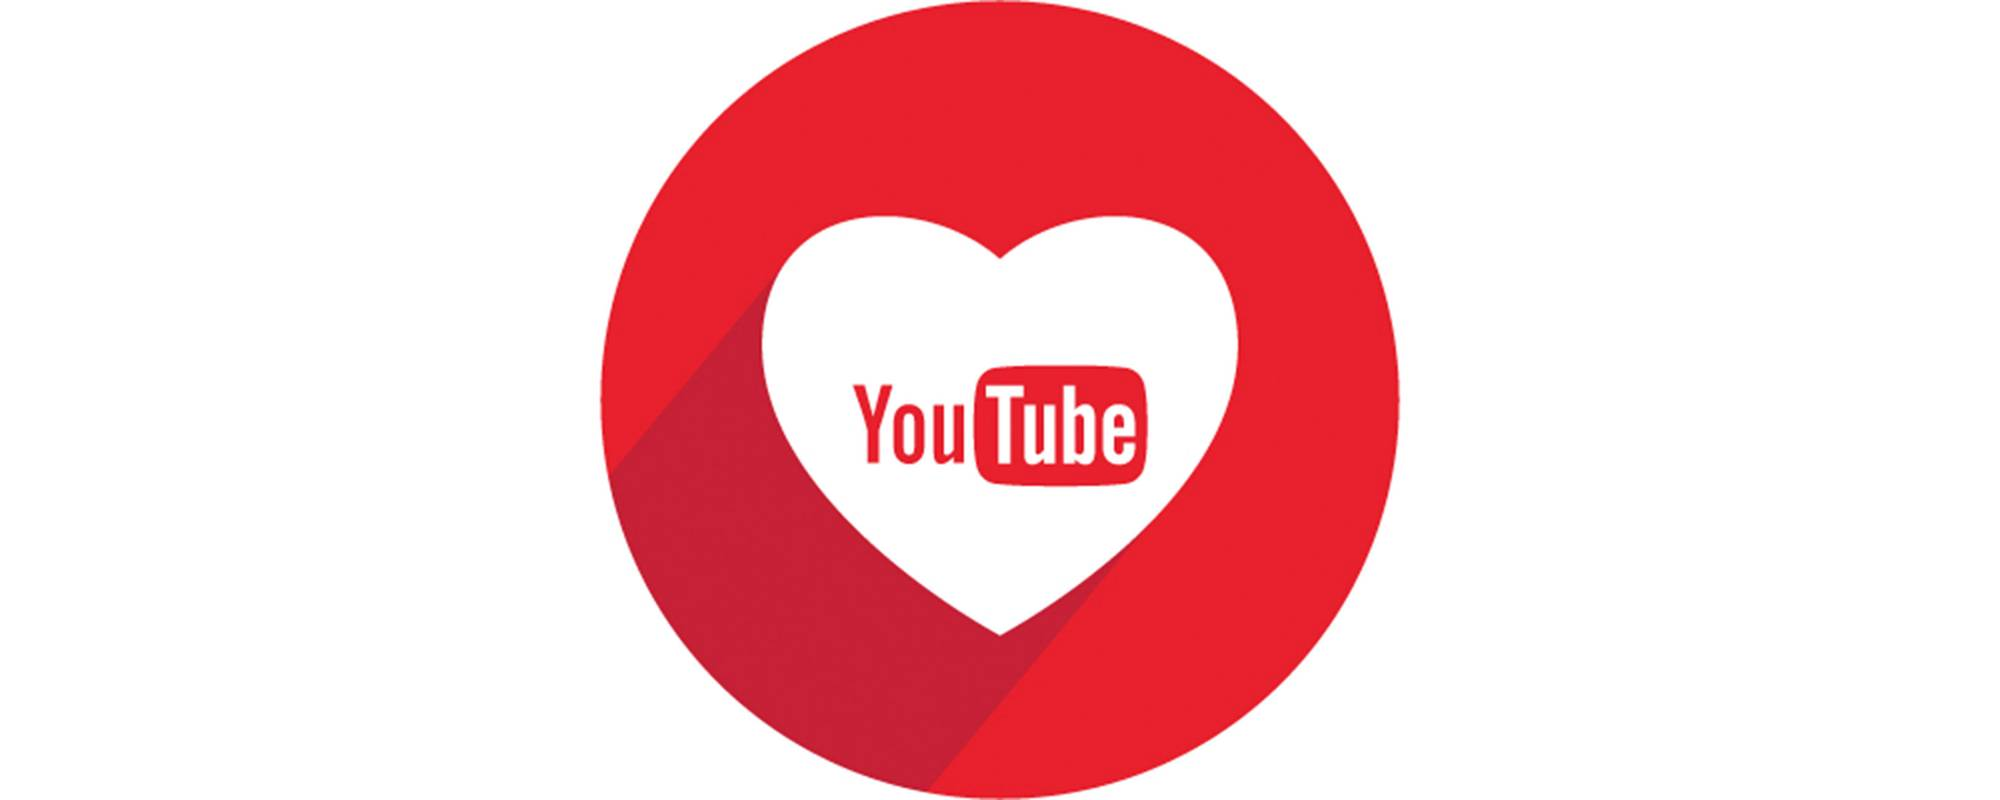